# EDA
This file should be utilized to do EDAs.
For EDAs, we used the non-normalized, non-feature engineered data.

# Import Files

In [4]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path

from datetime import datetime

# Settings

In [6]:
# path to where we store our preprocessed data for eda
data_file_path = Path("../data")

# Load Files

In [4]:
df_us_disasters = pd.read_csv(f"{data_file_path}/date_organized_us_disasters.csv", index_col=0) # Load date preprocessed data.

# EDA for Natural Disasters

In [5]:
df_us_disasters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 753
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               754 non-null    object 
 1   disaster_type      754 non-null    object 
 2   date               754 non-null    object 
 3   cpi_adjusted_cost  754 non-null    float64
 4   unadjusted_cost    754 non-null    float64
 5   deaths             754 non-null    float64
dtypes: float64(3), object(3)
memory usage: 41.2+ KB


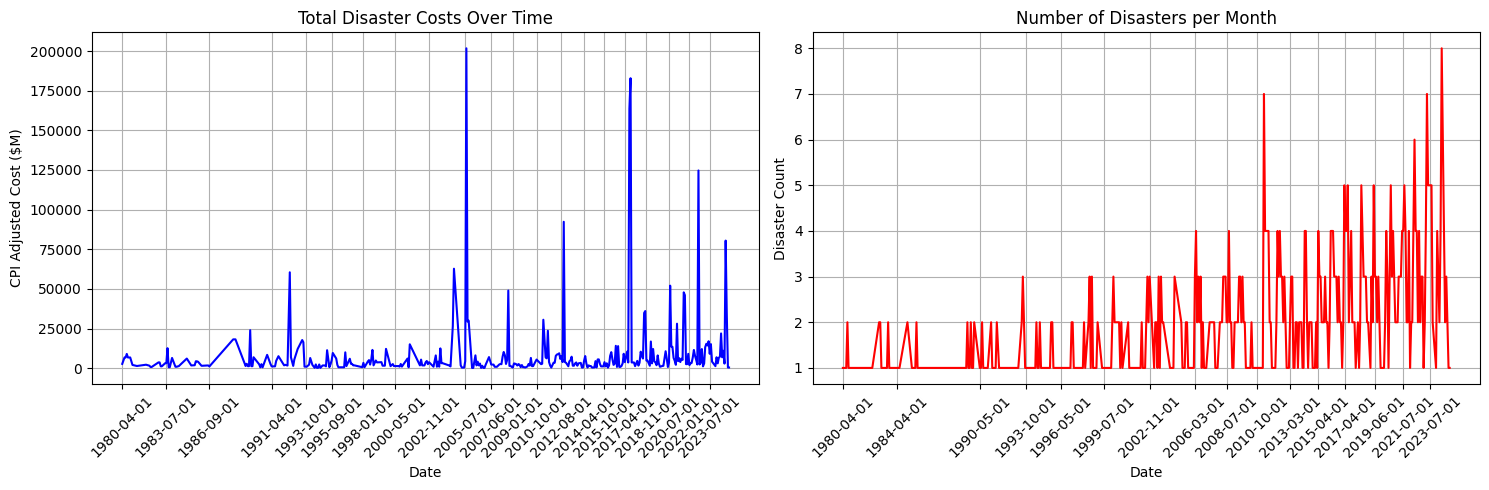

In [6]:
monthly_cost = df_us_disasters.groupby("date")["cpi_adjusted_cost"].sum()  # Total Disaster Costs Over Time
monthly_disasters = df_us_disasters.groupby("date")["name"].count() # Count number of disasters per month

monthly_cost.index = pd.to_datetime(monthly_cost.index)
monthly_disasters.index = pd.to_datetime(monthly_disasters.index)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Total Disaster Costs Over Time
axes[0].plot(monthly_cost, label="Total Cost", color="b")
axes[0].set_title("Total Disaster Costs Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("CPI Adjusted Cost ($M)")
axes[0].set_xticks(monthly_cost.index[::18])
axes[0].tick_params(axis="x", rotation=45)
axes[0].grid()

# Number of Disasters per Month
axes[1].plot(monthly_disasters, label="Disaster Count", color="r")
axes[1].set_title("Number of Disasters per Month")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Disaster Count")
axes[1].set_xticks(monthly_disasters.index[::24])
axes[1].tick_params(axis="x", rotation=45)
axes[1].grid()

plt.tight_layout()
plt.show()

C:\Users\sahn1\AppData\Local\Temp\ipykernel_8072\826019056.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\sahn1\AppData\Local\Temp\ipykernel_8072\826019056.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


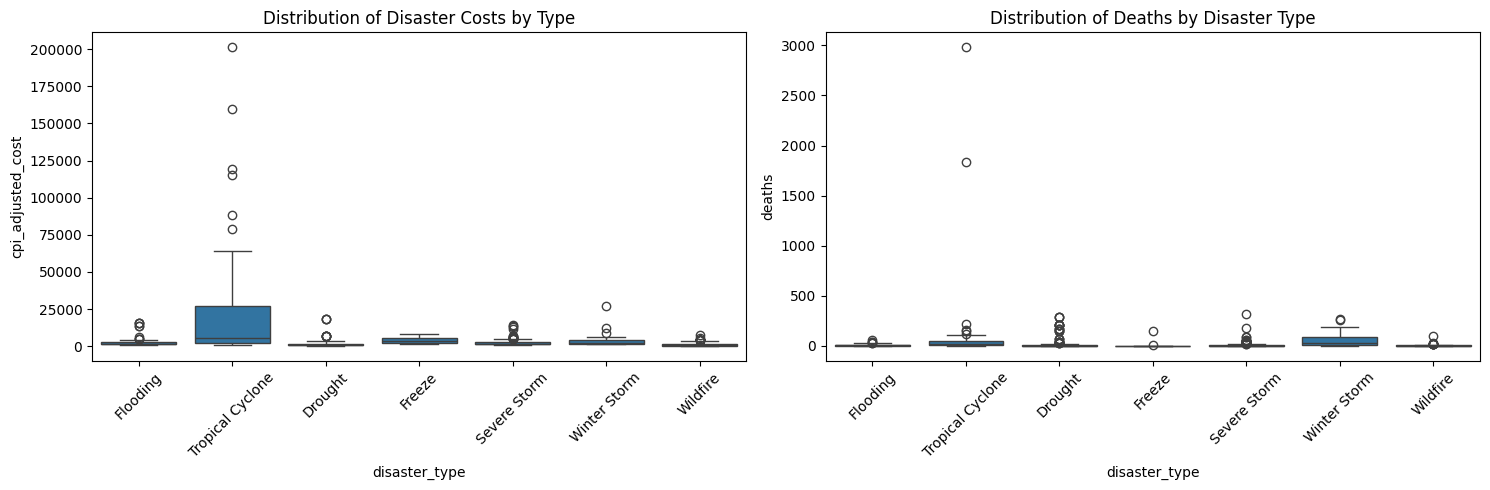

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Cost Distribution by Disaster Type
sns.boxplot(data=df_us_disasters, x="disaster_type", y="cpi_adjusted_cost", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title("Distribution of Disaster Costs by Type")

# Death Distribution by Disaster Type
sns.boxplot(data=df_us_disasters, x="disaster_type", y="deaths", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title("Distribution of Deaths by Disaster Type")

plt.tight_layout()
plt.show()

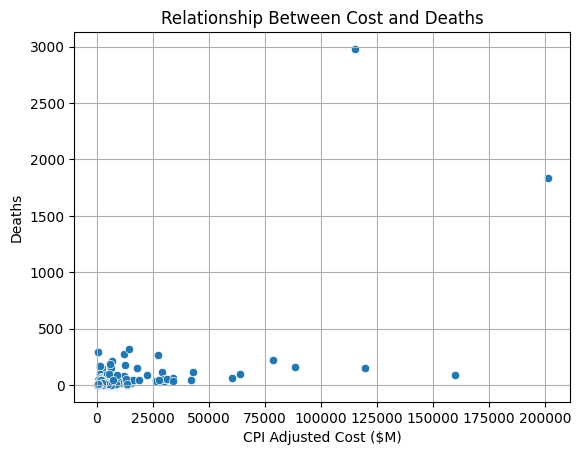

In [8]:
sns.scatterplot(data=df_us_disasters, x="cpi_adjusted_cost", y="deaths")
plt.title("Relationship Between Cost and Deaths")
plt.xlabel("CPI Adjusted Cost ($M)")
plt.ylabel("Deaths")
plt.grid()
plt.show()

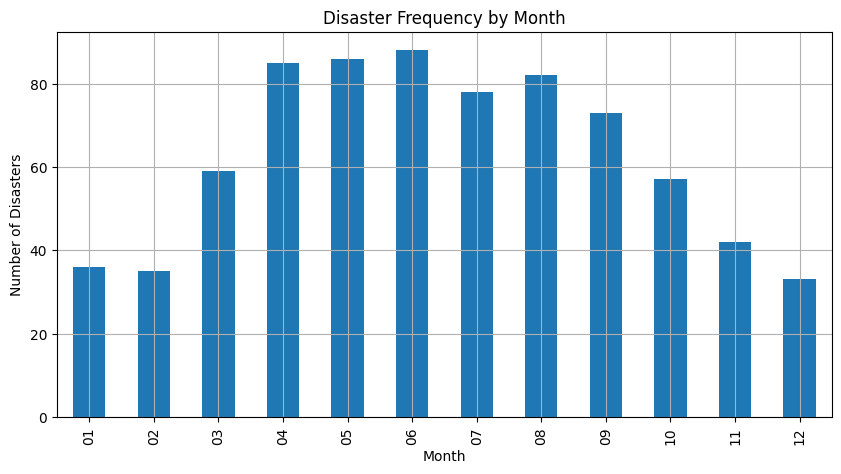

In [9]:
copy_df = df_us_disasters.copy()

copy_df["month"] = copy_df["date"].str[5:7]  # Extract month
seasonal_counts = copy_df["month"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
seasonal_counts.plot(kind="bar")
plt.title("Disaster Frequency by Month")
plt.xlabel("Month")
plt.ylabel("Number of Disasters")
plt.grid()
plt.show()

In [5]:
conn = redshift_connector.connect(
    host='cspc-workgroup.783764604578.us-west-2.redshift-serverless.amazonaws.com',
    database='cspc5071-dsa',
    port=5439,
    user='python_user',
    password='Database123!' # Not best practice but who cares :))
 )
cursor = conn.cursor()

# Query to get the list of tables in the specified schema
query = f"""
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public'
AND table_type = 'BASE TABLE';
"""

cursor.execute(query)
tables = cursor.fetchall()

print(f"Tables in schema public:")
for table in tables:
    print(table[0]) # These are all the data we have in AWS redshift.

Tables in schema public:
average_egg_price
us_national_outbreaks
h5n1_outbreaks
us_national_disaster
covid_hospitalization
us_population


In [6]:
# Function to query to redshift: Returns a dataframe 
def querying_to_redshift(query, cursor):
    cursor.execute(query)
    df : pd.DataFrame = cursor.fetch_dataframe()

    return df

In [14]:
bird = pd.read_csv("../data/date_organized_avian_flu_bird.csv", index_col = 0)
human = pd.read_csv("../data/date_organized_avian_flu_human.csv", index_col = 0)

In [ ]:
bird.head(), human.head()

In [ ]:
bird_plot = bird.groupby('yyyy_mm').size().reset_index(name='Flock_Count')
bird_plot

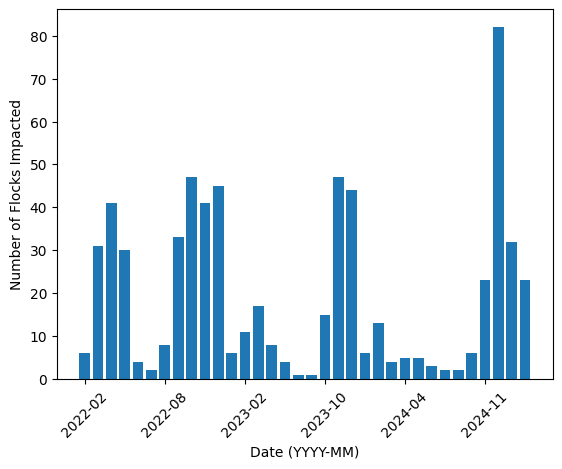

In [17]:
plt.bar(bird_plot['yyyy_mm'], bird_plot['Flock_Count'])
tick_positions = bird_plot['yyyy_mm'][::6]
plt.xticks(tick_positions, rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Flocks Impacted')
plt.show()

In [18]:
flocks_impacted_size = bird.groupby('yyyy_mm')['Flock Size'].sum().reset_index(name='Total_Flock_Size')
flocks_impacted_size.head()

,yyyy_mm,Total_Flock_Size
0,2022-02,348550
1,2022-03,9988239
2,2022-04,863435
3,2022-05,189266
4,2022-06,27343


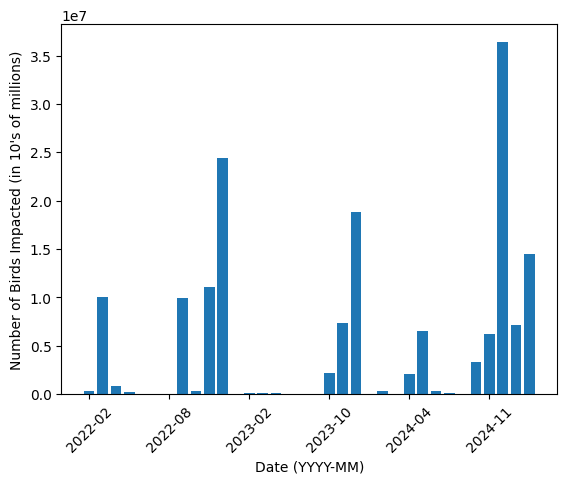

In [19]:
plt.bar(flocks_impacted_size['yyyy_mm'], flocks_impacted_size['Total_Flock_Size'])
tick_positions = flocks_impacted_size['yyyy_mm'][::6]
plt.xticks(tick_positions, rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Birds Impacted (in 10\'s of millions)')
plt.show()

In [20]:
people_impacted = human.groupby('yyyy_mm')['Human cases with highly pathogenic avian influenza A/H5N1 (monthly)'].sum().reset_index(name='People_Count')
people_impacted.head()

,yyyy_mm,People_Count
0,1997-01,54
1,1998-01,0
2,1999-01,0
3,2000-01,0
4,2001-01,0


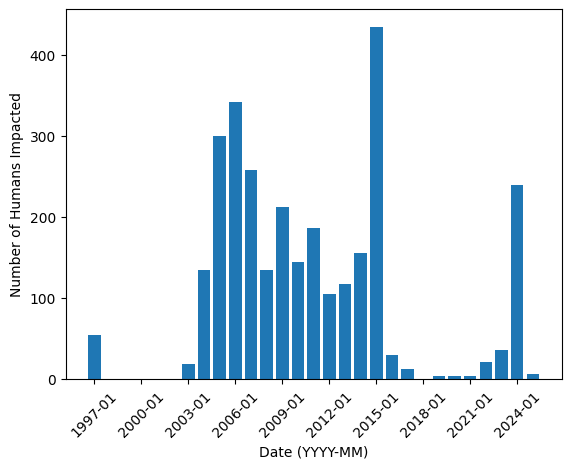

In [21]:
plt.bar(people_impacted['yyyy_mm'], people_impacted['People_Count'])
tick_positions = people_impacted['yyyy_mm'][::3]
plt.xticks(tick_positions, rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Humans Impacted')
plt.show()

# EDA for Weather Data

In [64]:
weather_avg = pd.read_csv(f"{data_file_path}/date_organized_weather_agg.csv", index_col=0)

print(weather_avg)
weather_avg.info()

        date    temp_WA    temp_IN    temp_MO    temp_WI
0    1980-01  31.851613  26.558065  31.693548  17.232258
1    1980-02  39.679310  21.993103  28.658621  16.448276
2    1980-03  41.074194  33.848387  39.796774  26.816129
3    1980-04  49.163333  48.016667  53.443333  44.306667
4    1980-05  52.761290  61.393548  64.667742  58.841935
..       ...        ...        ...        ...        ...
536  2024-09  60.206667  68.690000  70.476667  66.003333
537  2024-10  51.370968  58.016129  62.941935  54.748387
538  2024-11  43.463333  46.523333  48.440000  41.140000
539  2024-12  41.432258  33.738710  38.561290  26.116129
540  2025-01  36.654839  21.358065  25.474194  17.325806

[541 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 540
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     541 non-null    object 
 1   temp_WA  541 non-null    float64
 2   temp_IN  541 non-null    float64
 3 

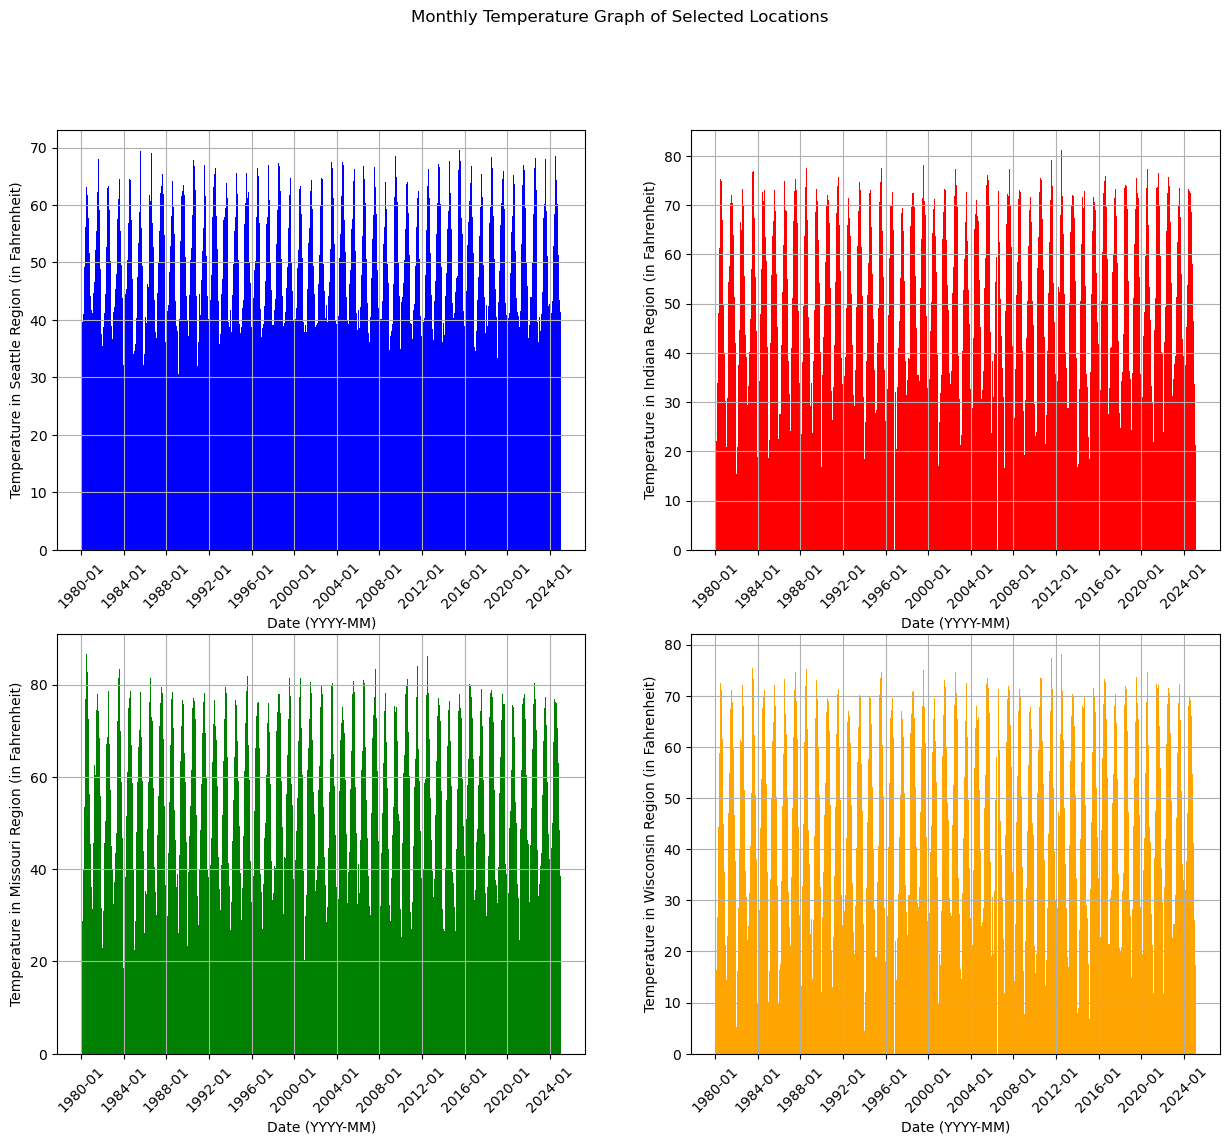

In [92]:
weather_avg.index = weather_avg['date']

tick_positions = weather_avg.index[::48]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

fig.suptitle('Monthly Temperature Graph of Selected Locations')

axes[0][0].bar(weather_avg.index, weather_avg['temp_WA'], color='b', align='edge', width = 0.999)
axes[0][0].set_xlabel('Date (YYYY-MM)')
axes[0][0].set_ylabel('Temperature in Seattle Region (in Fahrenheit)')
axes[0][0].set_xticks(tick_positions)
axes[0][0].tick_params(axis="x", rotation=45)
axes[0][0].grid()

axes[0][1].bar(weather_avg.index, weather_avg['temp_IN'], color='r', align='edge', width = 0.999)
axes[0][1].set_xlabel('Date (YYYY-MM)')
axes[0][1].set_ylabel('Temperature in Indiana Region (in Fahrenheit)')
axes[0][1].set_xticks(tick_positions)
axes[0][1].tick_params(axis="x", rotation=45)
axes[0][1].grid()

axes[1][0].bar(weather_avg.index, weather_avg['temp_MO'], color='g', align='edge', width = 0.999)
axes[1][0].set_xlabel('Date (YYYY-MM)')
axes[1][0].set_ylabel('Temperature in Missouri Region (in Fahrenheit)')
axes[1][0].set_xticks(tick_positions)
axes[1][0].tick_params(axis="x", rotation=45)
axes[1][0].grid()

axes[1][1].bar(weather_avg.index, weather_avg['temp_WI'], color='orange', align='edge', width = 0.999)
axes[1][1].set_xlabel('Date (YYYY-MM)')
axes[1][1].set_ylabel('Temperature in Wisconsin Region (in Fahrenheit)')
axes[1][1].set_xticks(tick_positions)
axes[1][1].tick_params(axis="x", rotation=45)
axes[1][1].grid()


Observing these weather graphs for each location shows us that locations where eggs are generated such as rural Indiana or Missouri tend to experience more extreme swings in temperatures than a location where egg rearing does not take place, such as Seattle. Wisconsin seems to experience an even larger variation in temperatures than the other two big egg-producing states. This may be a factor affecting egg production. Notably, over recent years, the mean temperatures during winter months are higher than they were in the 80s and 90s, most likely an effect of global warming.

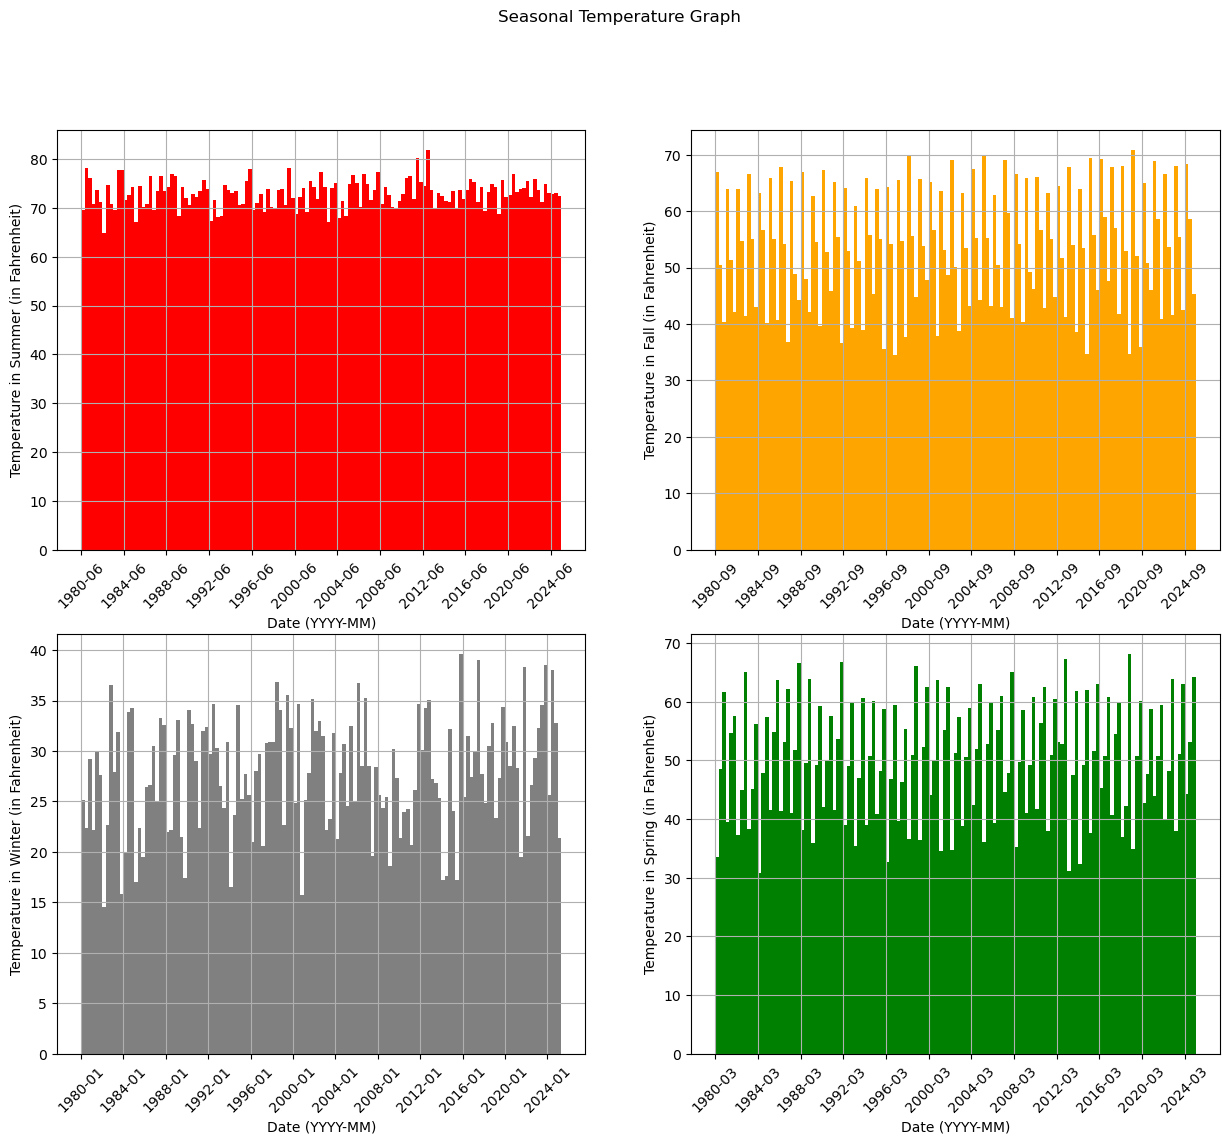

In [198]:
weather_avg['temp_overall'] = weather_avg[['temp_IN', 'temp_MO', 'temp_WI']].mean(axis=1)

weather_summer = pd.concat([weather_avg[weather_avg['date'].str[5:] == '06'],
                           weather_avg[weather_avg['date'].str[5:] == '07'],
                           weather_avg[weather_avg['date'].str[5:] == '08']])
weather_summer.sort_index(inplace=True) 

weather_fall = pd.concat([weather_avg[weather_avg['date'].str[5:] == '09'],
                           weather_avg[weather_avg['date'].str[5:] == '10'],
                           weather_avg[weather_avg['date'].str[5:] == '11']])
weather_fall.sort_index(inplace=True) 

weather_winter = pd.concat([weather_avg[weather_avg['date'].str[5:] == '12'],
                           weather_avg[weather_avg['date'].str[5:] == '01'],
                           weather_avg[weather_avg['date'].str[5:] == '02']])
weather_winter.sort_index(inplace=True) 

weather_spring = pd.concat([weather_avg[weather_avg['date'].str[5:] == '03'],
                           weather_avg[weather_avg['date'].str[5:] == '04'],
                           weather_avg[weather_avg['date'].str[5:] == '05']])
weather_spring.sort_index(inplace=True) 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

fig.suptitle('Seasonal Temperature Graph')

axes[0][0].bar(weather_summer.index, weather_summer['temp_overall'], color='r', align='edge', width = 0.999)
axes[0][0].set_xlabel('Date (YYYY-MM)')
axes[0][0].set_ylabel('Temperature in Summer (in Fahrenheit)')
axes[0][0].set_xticks(weather_summer.index[::12])
axes[0][0].tick_params(axis="x", rotation=45)
axes[0][0].grid()

axes[0][1].bar(weather_fall.index, weather_fall['temp_overall'], color='orange', align='edge', width = 0.999)
axes[0][1].set_xlabel('Date (YYYY-MM)')
axes[0][1].set_ylabel('Temperature in Fall (in Fahrenheit)')
axes[0][1].set_xticks(weather_fall.index[::12])
axes[0][1].tick_params(axis="x", rotation=45)
axes[0][1].grid()

axes[1][0].bar(weather_winter.index, weather_winter['temp_overall'], color='grey', align='edge', width = 0.999)
axes[1][0].set_xlabel('Date (YYYY-MM)')
axes[1][0].set_ylabel('Temperature in Winter (in Fahrenheit)')
axes[1][0].set_xticks(weather_winter.index[::12])
axes[1][0].tick_params(axis="x", rotation=45)
axes[1][0].grid()

axes[1][1].bar(weather_spring.index, weather_spring['temp_overall'], color='g', align='edge', width = 0.999)
axes[1][1].set_xlabel('Date (YYYY-MM)')
axes[1][1].set_ylabel('Temperature in Spring (in Fahrenheit)')
axes[1][1].set_xticks(weather_spring.index[::12])
axes[1][1].tick_params(axis="x", rotation=45)
axes[1][1].grid()